## What is Clustering?
Cluster analysis groups data objects based only on information found in the data that describes the objects and their relationships. The goal is that the objects within a group be similar (or related) to one another and different from (or unrelated to) the objects in other groups. The greater the similarity (or homogeneity) within a group and greater the difference between groups, the better or more distinct the clustering[1]

**Types of Clustering**

**Partitional Clustering**
- A division of data objects into non-overlapping subsets (clusters) such that each data object is in exactly one subset
- KMeans, DBSCAN

**Hierarchical clustering**
- A set of nested clusters organized as a hierarchical tree
- Can be visualized as a dendrogram (A tree like diagram that records the sequences of merges or splits)
- Agglomerative, Divisive

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

import matplotlib.pyplot as plt 
%matplotlib inline

#from pylab import rcParams
import seaborn as sns
#sns.reset_defaults()
sns.set(style='whitegrid', context='notebook')
#sns.reset_orig()

In [2]:
cdata = pd.read_csv('clusters.csv', header=None, names=['x', 'y'])
cdata.head()

,x,y
0,9.802,10.132
1,10.350,9.768
2,10.098,9.988
3,9.730,9.910
4,9.754,10.430


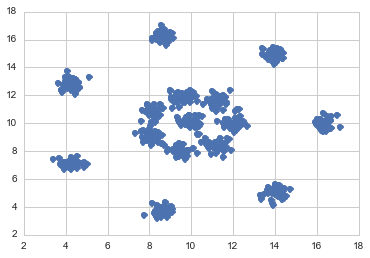

In [3]:
#rcParams['figure.figsize'] = 6, 4
fig = plt.figure(figsize=(6, 4))
ds = np.array(cdata)
# plot the data observations
plt.plot(ds[:,0], ds[:,1], 'o')
plt.grid(True)
plt.show()

In [4]:
k = 7
kmeans = KMeans(n_clusters=k)
kmeans.fit(cdata)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [5]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

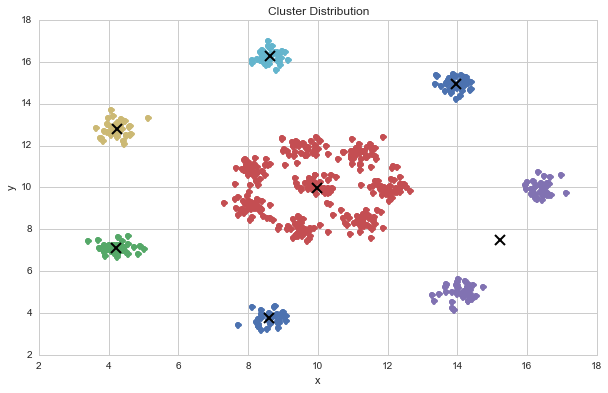

In [6]:
fig = plt.figure(figsize=(10, 6))
for i in range(k):
    # select only data observations with cluster label == i
    ds = np.array(cdata.loc[np.where(labels == i)])
    # plot the data observations
    plt.plot(ds[:,0], ds[:,1], 'o')
    # plot the centroids
    centre = plt.plot(centroids[i,0], centroids[i,1], 'kx')
    # make the centroid x's bigger
    plt.setp(centre, ms=10.0)
    plt.setp(centre, mew=2.0)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Cluster Distribution')
    plt.grid(True)
plt.show()

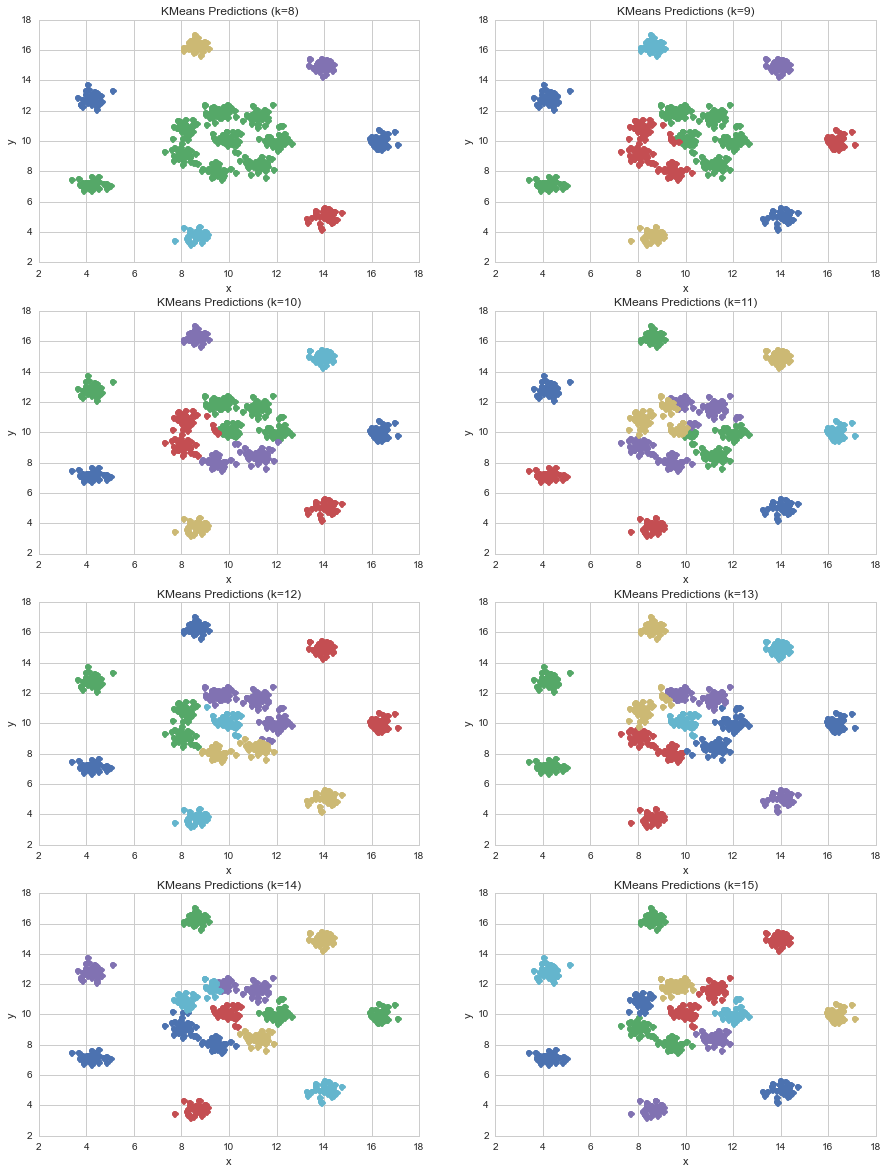

In [8]:
fig = plt.figure(figsize=(15, 20))
k = 8
for row in range(0,4):
    for col in range(0,2):
        ax = plt.subplot2grid((4,2), (row,col))
        
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(cdata)
        
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        
        for i in range(k):
            # select only data observations with cluster label == i
            ds = np.array(cdata.loc[np.where(labels == i)])
            # plot the data observations
            ax.plot(ds[:,0], ds[:,1], 'o')
            # plot the centroids
            centre = ax.plot(centroids[i,0], centroids[i,1], 'kx', linewidth=20)
            # make the centroid x's bigger
            #ax.setp(centre, ms=10.0)
            #plt.setp(centre, mew=2.0)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_title('KMeans Predictions (k=%d)' % k)
            ax.grid(True)
        
        k = k + 1

### Performing hierarchical/agglomerative clustering based on the condensed distance matrix using scipy
http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html  
linkage(y[, method, metric])	Performs hierarchical/agglomerative clustering on the condensed distance matrix y.

In [60]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_1','ID_2','ID_3','ID_4', 'ID_5', 'ID_6', 'ID_7', 'ID_8','ID_9','ID_10']
X = np.random.random_sample([10,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df = df.drop('Z', axis=1)

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


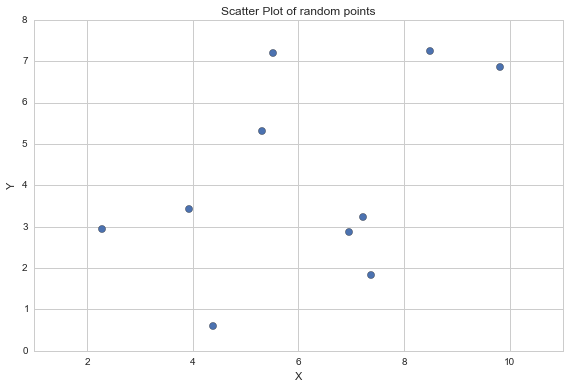

In [68]:
df.plot.scatter(x='X', y='Y', s=50)
plt.title('Scatter Plot of random points')
plt.tight_layout()
plt.show()

In [62]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
    pdist(df, metric='euclidean')),
    columns=labels, index=labels)
row_dist

,ID_1,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10
ID_1,0.000000,4.569949,4.896710,3.096504,3.432137,1.116569,2.959064,4.642397,0.450593,4.682672
ID_2,4.569949,0.000000,4.308442,4.085813,6.693543,5.685017,1.886793,2.981587,4.318625,5.344432
ID_3,4.896710,4.308442,0.000000,6.806106,8.275185,5.579249,4.745543,1.371801,4.446123,8.480738
ID_4,3.096504,4.085813,6.806106,0.000000,2.872810,3.813812,2.345857,5.954064,3.309441,1.711576
ID_5,3.432137,6.693543,8.275185,2.872810,0.000000,3.236317,4.812177,7.814951,3.871688,3.146471
ID_6,1.116569,5.685017,5.579249,3.813812,3.236317,0.000000,4.057766,5.533016,1.413255,5.217253
ID_7,2.959064,1.886793,4.745543,2.345857,4.812177,4.057766,0.000000,3.716899,2.829592,3.855927
ID_8,4.642397,2.981587,1.371801,5.954064,7.814951,5.533016,3.716899,0.000000,4.211003,7.559024
ID_9,0.450593,4.318625,4.446123,3.309441,3.871688,1.413255,2.829592,4.211003,0.000000,4.950447
ID_10,4.682672,5.344432,8.480738,1.711576,3.146471,5.217253,3.855927,7.559024,4.950447,0.000000


Using the preceding code, we calculated the Euclidean distance between each pair of sample points in our dataset based on the features X, Y, and Z. We provided the condensed distance matrix—returned by pdist—as input to the squareform function to create a symmetrical matrix of the pair-wise distances.

## Evalutation of Agglomerative Clustering using the linkage matrix and visualizing by a Dendrogram

We now apply the complete linkage agglomeration to our clusters using the linkage function from SciPy's cluster.hierarchy submodule, which returns a so-called linkage matrix. The linkage method takes a condensed or redundant distance matrix as input. A condensed distance matrix is a flat array containing the upper triangular of the distance matrix. This is the form that pdist returns. Alternatively, a collection of m observation vectors in n dimensions may be passed as an m by n array.

Based on the function description, we conclude that we can use a condensed distance matrix (upper triangular) from the pdist function as an input attribute. Alternatively, we could also provide the initial data array and use the euclidean metric as a function argument in linkage. However, we should not use the squareform distance matrix that we calculated above, since it would yield different distance values from those expected.

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


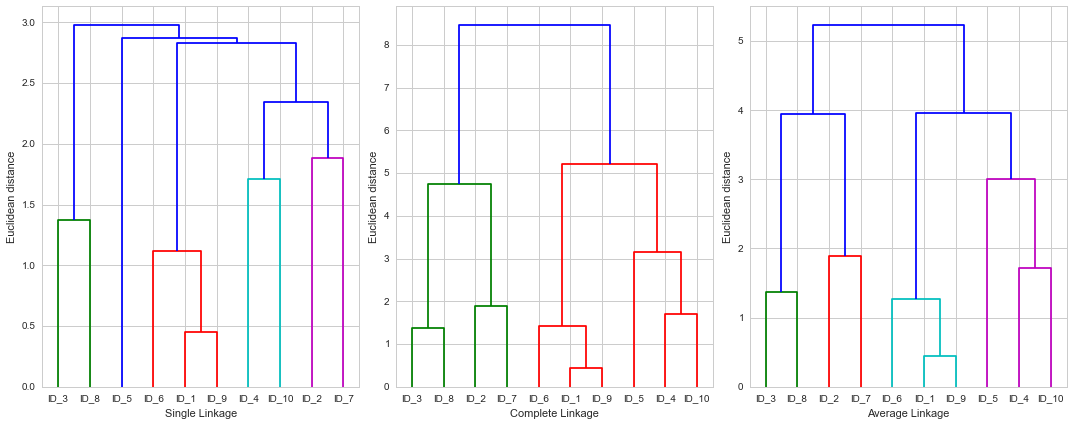

In [67]:
# Plot different dendograms in the same figure
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

fig = plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
row_clusters = linkage(pdist(df, metric='euclidean'), method='single')
dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.xlabel('Single Linkage')

plt.subplot(1,3,2)
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.xlabel('Complete Linkage')

plt.subplot(1,3,3)
row_clusters = linkage(pdist(df, metric='euclidean'), method='average')
dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.xlabel('Average Linkage')

### Applying agglomerative clustering via scikit-learn

In [14]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


Looking at the predicted cluster labels, we can see that the first, fourth, and fifth sample (ID_0, ID_3, and ID_4) were assigned to one cluster (0), and the samples ID_1 and ID_2 were assigned to a second cluster (1), which is consistent with the results that we can observe in the dendrogram.

Cutting a Dendogram horizontally will give us the number of clusters. If we make a cut at 7 in the complete Linkage graph it will give us 2 clusters whereas making a cut at 5 will give us 3 clusters.

In [15]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


If we make a cut at 5 then we will get 3 clusters. This is also validated by setting the parameter n_clusters = 3. Looking at the predicted cluster labels, we can see that the fourth sample (ID_3) was assigned to one cluster (0), first, and fifth sample (ID_0 and ID_4) were assigned to one cluster (1), and the samples ID_1 and ID_2 were assigned to a third cluster (2), which is consistent with the results that we can observe in the dendrogram.

### Locating regions of high density via DBSCAN
Density-based Spatial Clustering of Applications with Noise (DBSCAN).

The notion of density
in DBSCAN is defined as the number of points within a specified radius $\varepsilon$
In DBSCAN, a special label is assigned to each sample (point) using the
following criteria:
- A point is considered as **core point** if at least a specified number (MinPts) of neighboring points fall within the specified radius $\varepsilon$
- A **border point** is a point that has fewer neighbors than MinPts within $\varepsilon$, but lies within the $\varepsilon$ radius of a core point
- All other points that are neither core nor border points are considered as **noise points**

After labeling the points as core, border, or noise points, the DBSCAN algorithm can be summarized in two simple steps:
1. Form a separate cluster for each core point or a connected group of core points (core points are connected if they are no farther away than $\varepsilon$).
2. Assign each border point to the cluster of its corresponding core point.

One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn't necessarily assign each point to a cluster but is capable of removing noise points.[2]

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


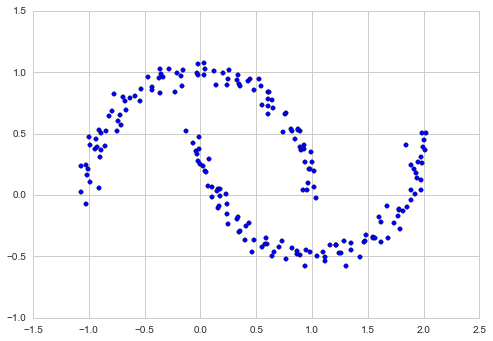

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

As we can see in the resulting plot, there are two visible, half-moon-shaped groups consisting of 100 sample points each. We will use the k-means algorithm and complete linkage clustering to see whether one of those previously discussed clustering algorithms can successfully identify the half-moon shapes as separate clusters.

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


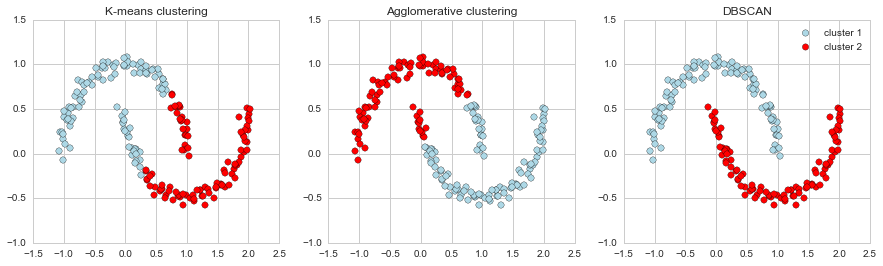

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0], X[y_km==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1,0], X[y_km==1,1], c='red', marker='o', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0], X[y_ac==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1,0], X[y_ac==1,1], c='red', marker='o', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
ax3.scatter(X[y_db==0,0], X[y_db==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax3.scatter(X[y_db==1,0], X[y_db==1,1], c='red', marker='o', s=40, label='cluster 2')
ax3.set_title('DBSCAN')

plt.legend()
plt.show()

The DBSCAN algorithm can successfully detect the half-moon shapes, which highlights one of the strengths of DBSCAN (clustering data of arbitrary shapes).

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


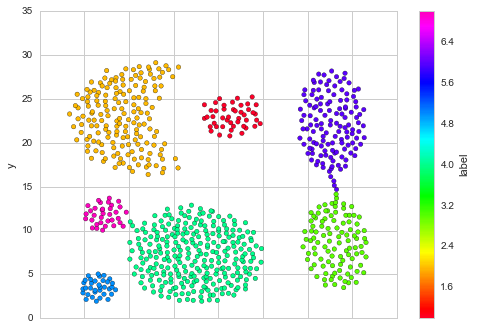

In [18]:
df = pd.read_table('shapes/Aggregation.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


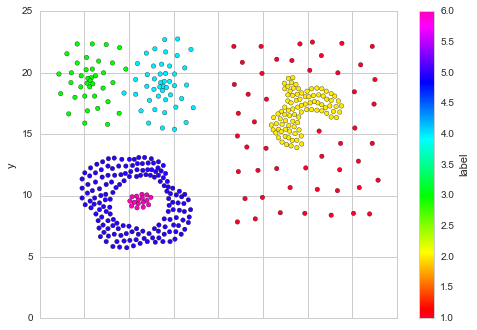

In [19]:
df = pd.read_table('shapes/Compound.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#cm = plt.cm.get_cmap('spectral')  # or your colormap of choice
#cm = plt.cm.get_cmap('gnuplot')
#cm = plt.cm.get_cmap('gist_rainbow')
#cm = plt.cm.get_cmap('rainbow')
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');
#df.plot.scatter(x='x', y='y');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


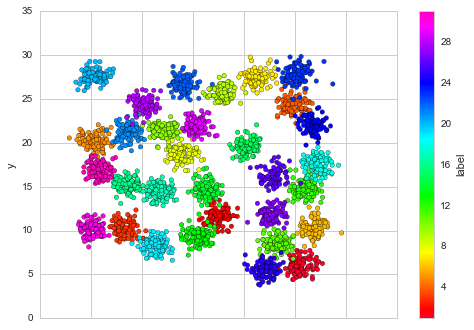

In [20]:
df = pd.read_table('shapes/D31.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


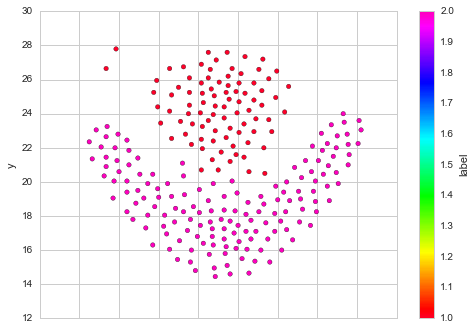

In [21]:
df = pd.read_table('shapes/flame.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


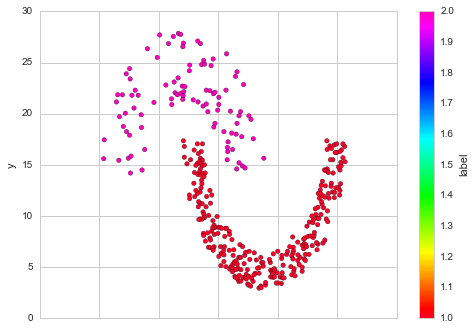

In [22]:
df = pd.read_table('shapes/jain.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


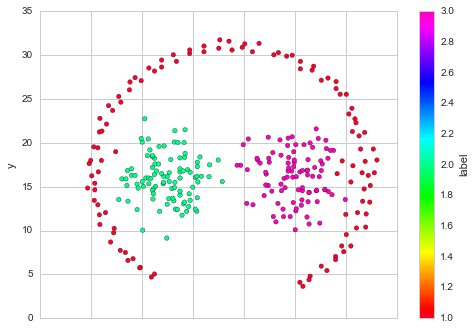

In [23]:
df = pd.read_table('shapes/pathbased.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


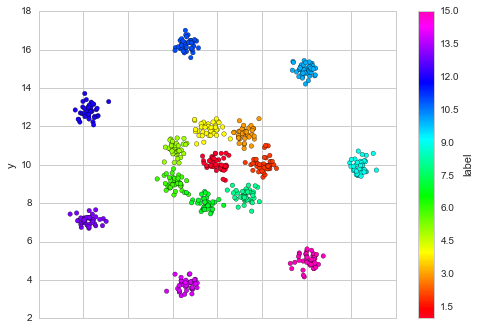

In [24]:
df = pd.read_table('shapes/R15.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


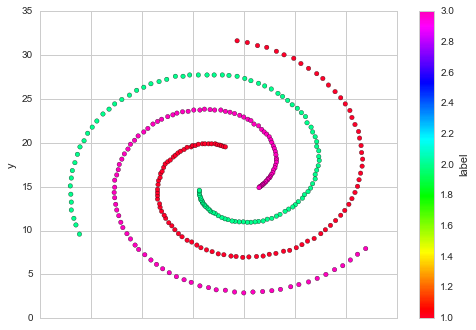

In [25]:
df = pd.read_table('shapes/spiral.txt', sep='\t', header=None, names=['x', 'y', 'label'])
##df = df.drop('label', axis=1)
#df.plot.scatter(x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

In [26]:
db = DBSCAN(eps=0.1, min_samples=3, metric='euclidean')
y_db = db.fit_predict(df)
print(np.unique(y_db))

[-1]
